<a href="https://colab.research.google.com/github/laurence-lin/Coursera_Capstone/blob/master/Final_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import ndcg_score

import os
import math
import gc

import pandas as pd
import numpy as np

from google.colab import files
import folium

print('Library imported.')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Library imported.


In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)

In [3]:
files.upload()
df_ny_data = pd.read_csv('df_ny_feature.csv', index_col = None)
print(df_ny_data.head())


Saving df_ny_feature.csv to df_ny_feature.csv
       name_x  latitude  longitude                  venue_id         city  \
0  McDonald's   40.7578   -73.9854  5cf87778b399f7002cf1071a     New York   
1  McDonald's   40.7266   -74.0386  4bf5553ecad2c928a9e49c99  Jersey City   
2  McDonald's   40.7609   -73.9673  4f7f4df2754a7bf483d814c8     New York   
3  McDonald's   40.7609   -73.9673  52e9a22e498e55622108b7d9     New York   
4  McDonald's   40.7595   -73.9183  4b304c35f964a520b8f824e3      Astoria   

   ratings  comments  Density  neighbor_entropy  competitiveness  \
0      3.3       318     41.0          2.466631        -0.268293   
1      3.7       622     43.0          3.150678        -0.186047   
2      3.8      1644     26.0          2.971377        -0.230769   
3      3.8      1644     26.0          2.971377        -0.230769   
4      3.9       652     15.0          2.488328        -0.200000   

   other_food_neighbor  food_neighbor_rate  residence_venue  
0                   

In [5]:
files.upload()
df_to_data = pd.read_csv('df_to_feature.csv', index_col = False)
df_to_data.rename(columns={'residence':'residence_venue'}, inplace = True)
df_to_data.head()


Saving df_to_feature.csv to df_to_feature.csv


,name_x,latitude,longitude,venue_id_x,city_x,name_y,venue_id_y,city_y,name,ratings,comments,Density,neighbor_entropy,competitiveness,other_food_neighbor,food_neighbor_rate,residence_venue
0,McDonald's,43.770,-79.370,4af41aa4f964a52016f021e3,North York,McDonald's,4af41aa4f964a52016f021e3,North York,McDonald's,3.5,2472,4.0,1.386294,-0.250000,1,0.250000,0
1,McDonald's,43.705,-79.452,52ed1927498e2e54dfbcc99b,Toronto,NaN,NaN,NaN,McDonald's,3.1,1347,2.0,0.693147,-0.500000,0,0.000000,0
2,McDonald's,43.759,-79.465,4b9277e5f964a520e0fb33e3,Toronto,McDonald's,4b9277e5f964a520e0fb33e3,Toronto,McDonald's,3.6,1816,10.0,2.302585,-0.200000,4,0.400000,0
3,McDonald's,43.709,-79.474,5a9ed4911953f36931561899,Toronto,McDonald's,5a9ed4911953f36931561899,Toronto,McDonald's,2.9,160,9.0,2.197225,-0.222222,4,0.444444,0
4,McDonald's,43.669,-79.340,4af04dd6f964a5201fdb21e3,Toronto,NaN,NaN,NaN,McDonald's,3.6,898,12.0,2.369382,-0.333333,8,0.666667,0


In [6]:
features = ['Density', 'neighbor_entropy', 'competitiveness', 'other_food_neighbor', 'food_neighbor_rate', 'residence_venue', 'comments', 'ratings']
df_ny_data = df_ny_data[features]
df_to_data = df_to_data[features]
print(df_ny_data.head())

   Density  neighbor_entropy  competitiveness  other_food_neighbor  \
0     41.0          2.466631        -0.268293                   25   
1     43.0          3.150678        -0.186047                   29   
2     26.0          2.971377        -0.230769                   20   
3     26.0          2.971377        -0.230769                   20   
4     15.0          2.488328        -0.200000                    8   

   food_neighbor_rate  residence_venue  comments  ratings  
0            0.609756                3       318      3.3  
1            0.674419                2       622      3.7  
2            0.769231                5      1644      3.8  
3            0.769231                5      1644      3.8  
4            0.533333                5       652      3.9  


In [7]:
df_data = pd.concat([df_ny_data, df_to_data], axis = 0)
print(df_data.shape)

(81, 8)


###Observe linear relationship between individual features and number of comments

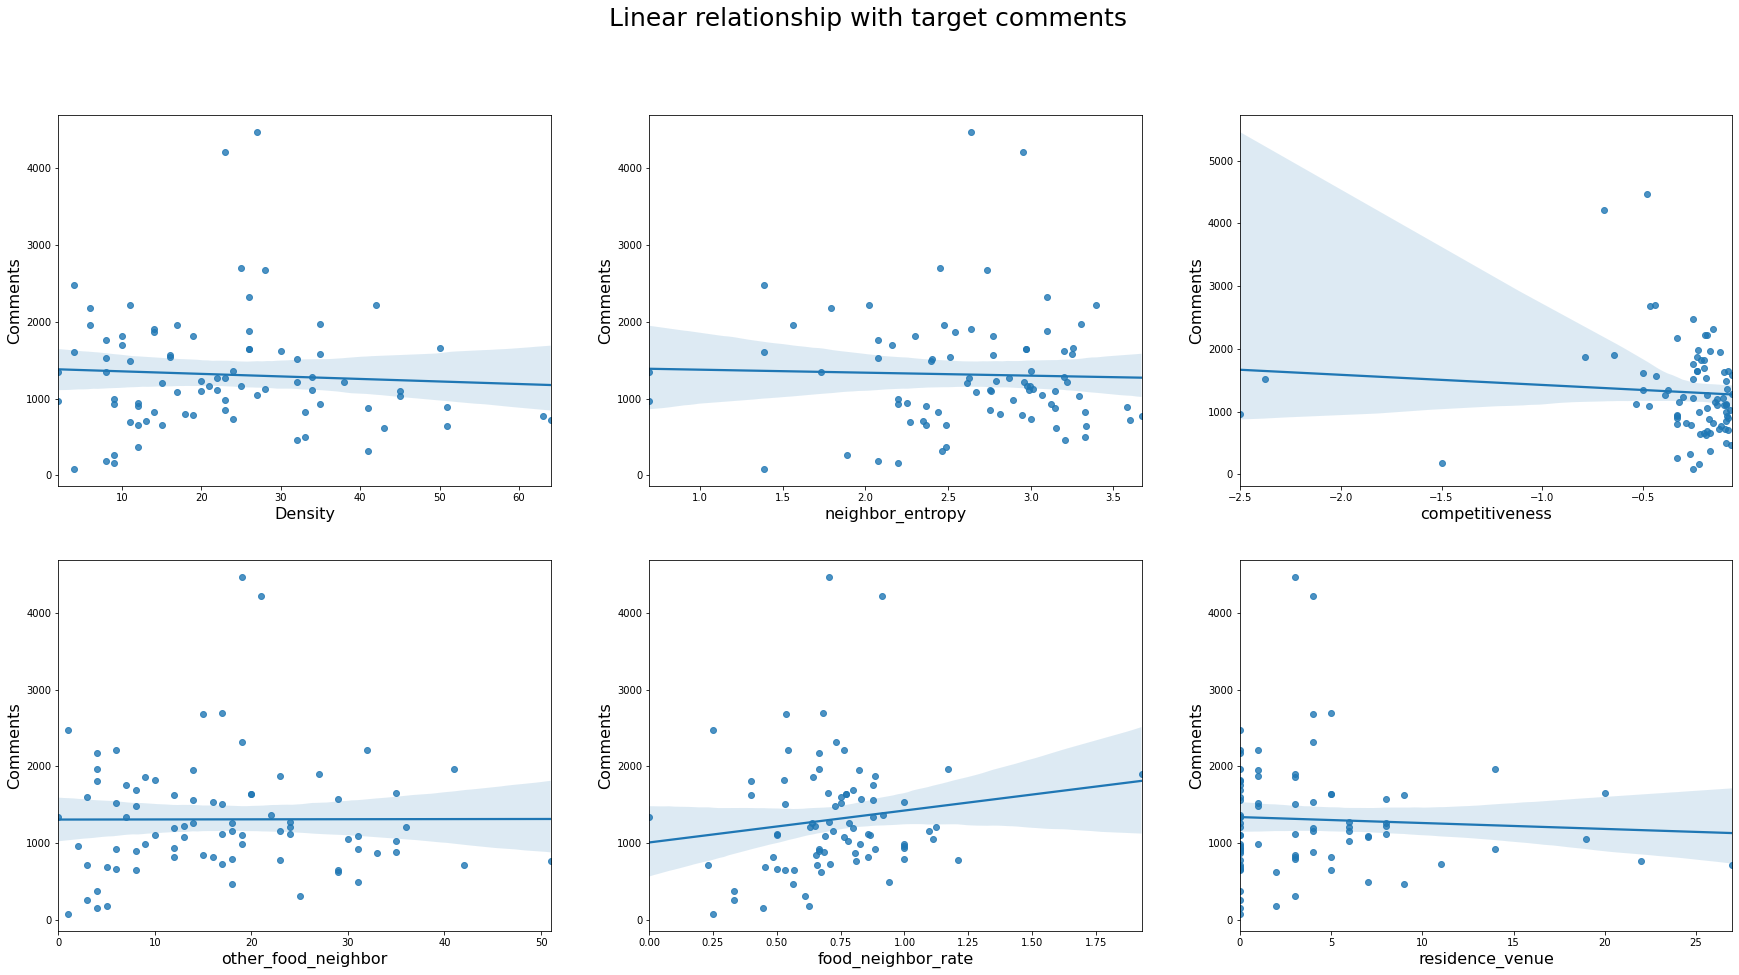

In [8]:
features = ['Density', 'neighbor_entropy', 'competitiveness', 'other_food_neighbor', 'food_neighbor_rate', 'residence_venue']

fig = plt.figure(figsize = (30, 15))
fig.suptitle('Linear relationship with target comments', fontsize = 25)

for i in range(len(features)):
  ax = fig.add_subplot(2, 3, i + 1)
  sns.regplot(df_data[features[i]], df_data['comments'], ax = ax)
  ax.set_xlabel(features[i], fontsize = 16)
  ax.set_ylabel('Comments', fontsize = 16)
    

###Observe relationship btw individual features and ratings

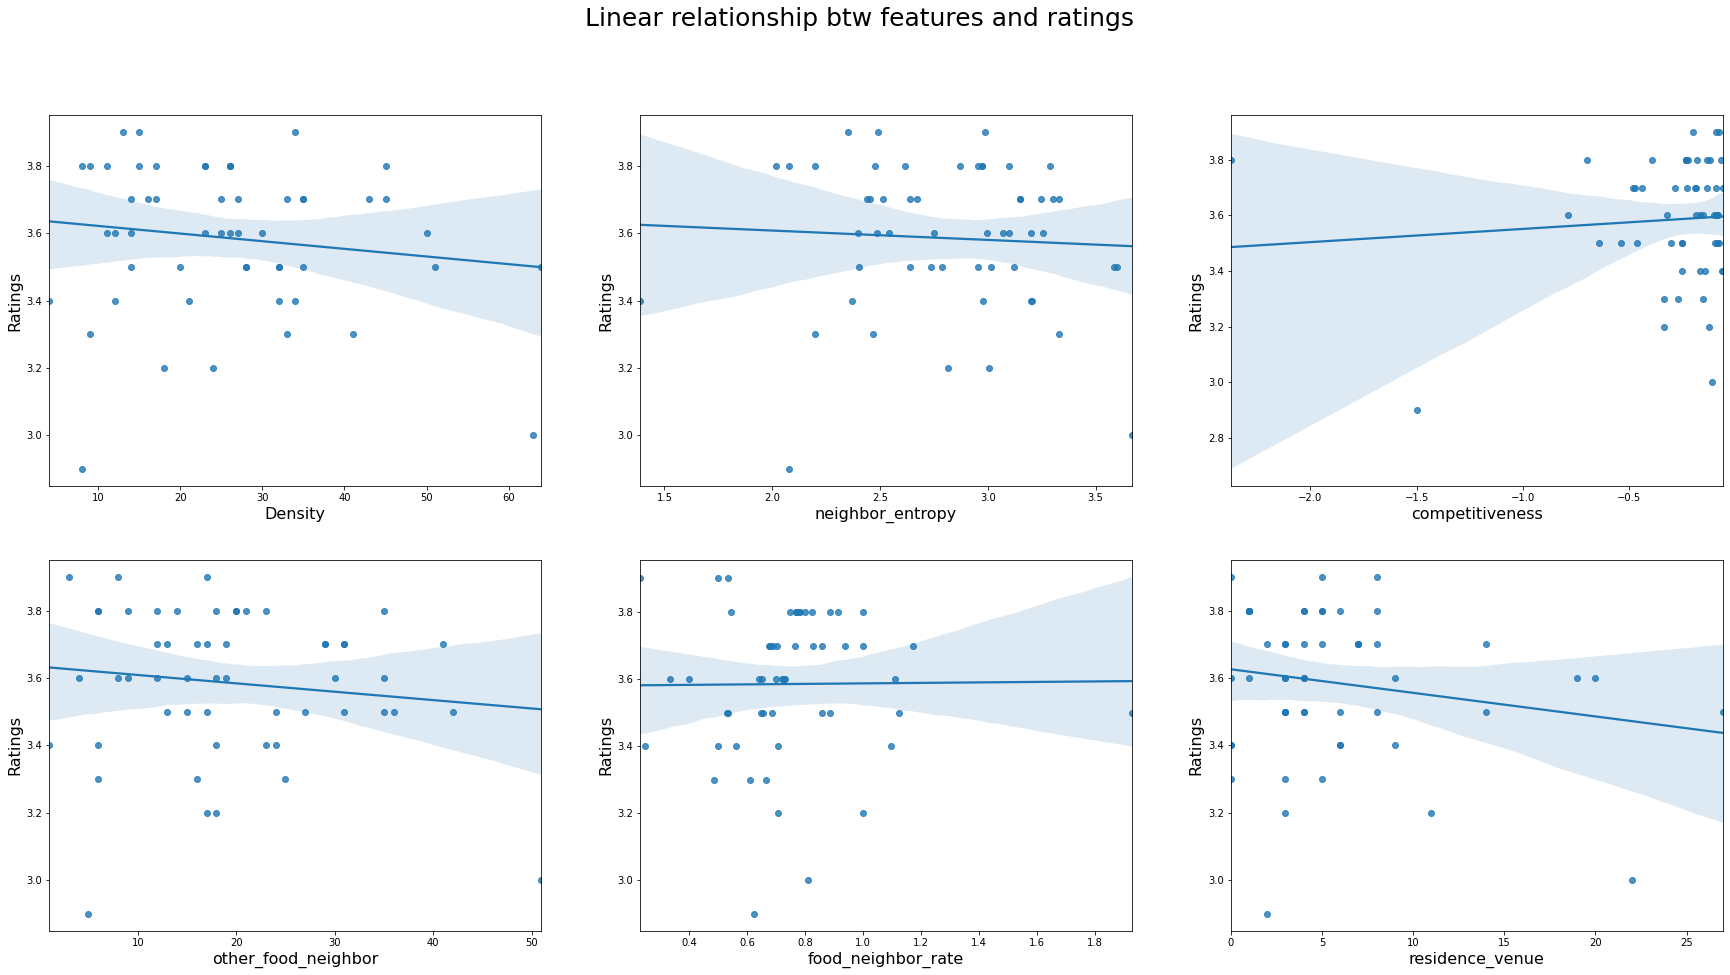

In [9]:
fig = plt.figure(figsize = (30, 15))
fig.suptitle('Linear relationship btw features and ratings', fontsize = 25)

for i in range(len(features)):
  ax = fig.add_subplot(2, 3, i + 1)
  sns.regplot(df_ny_data[features[i]], df_ny_data['ratings'], ax = ax)
  ax.set_xlabel(features[i], fontsize = 16)
  ax.set_ylabel('Ratings', fontsize = 16)

In [10]:
#Try to remove outliers from comments and ratings
# drop comment outliers > 4000
df_ny_data = df_ny_data[df_ny_data['comments'] < 4000]

#Drop ratings outliers < 3.1
df_ny_data = df_ny_data[df_ny_data['ratings'] > 3.1]


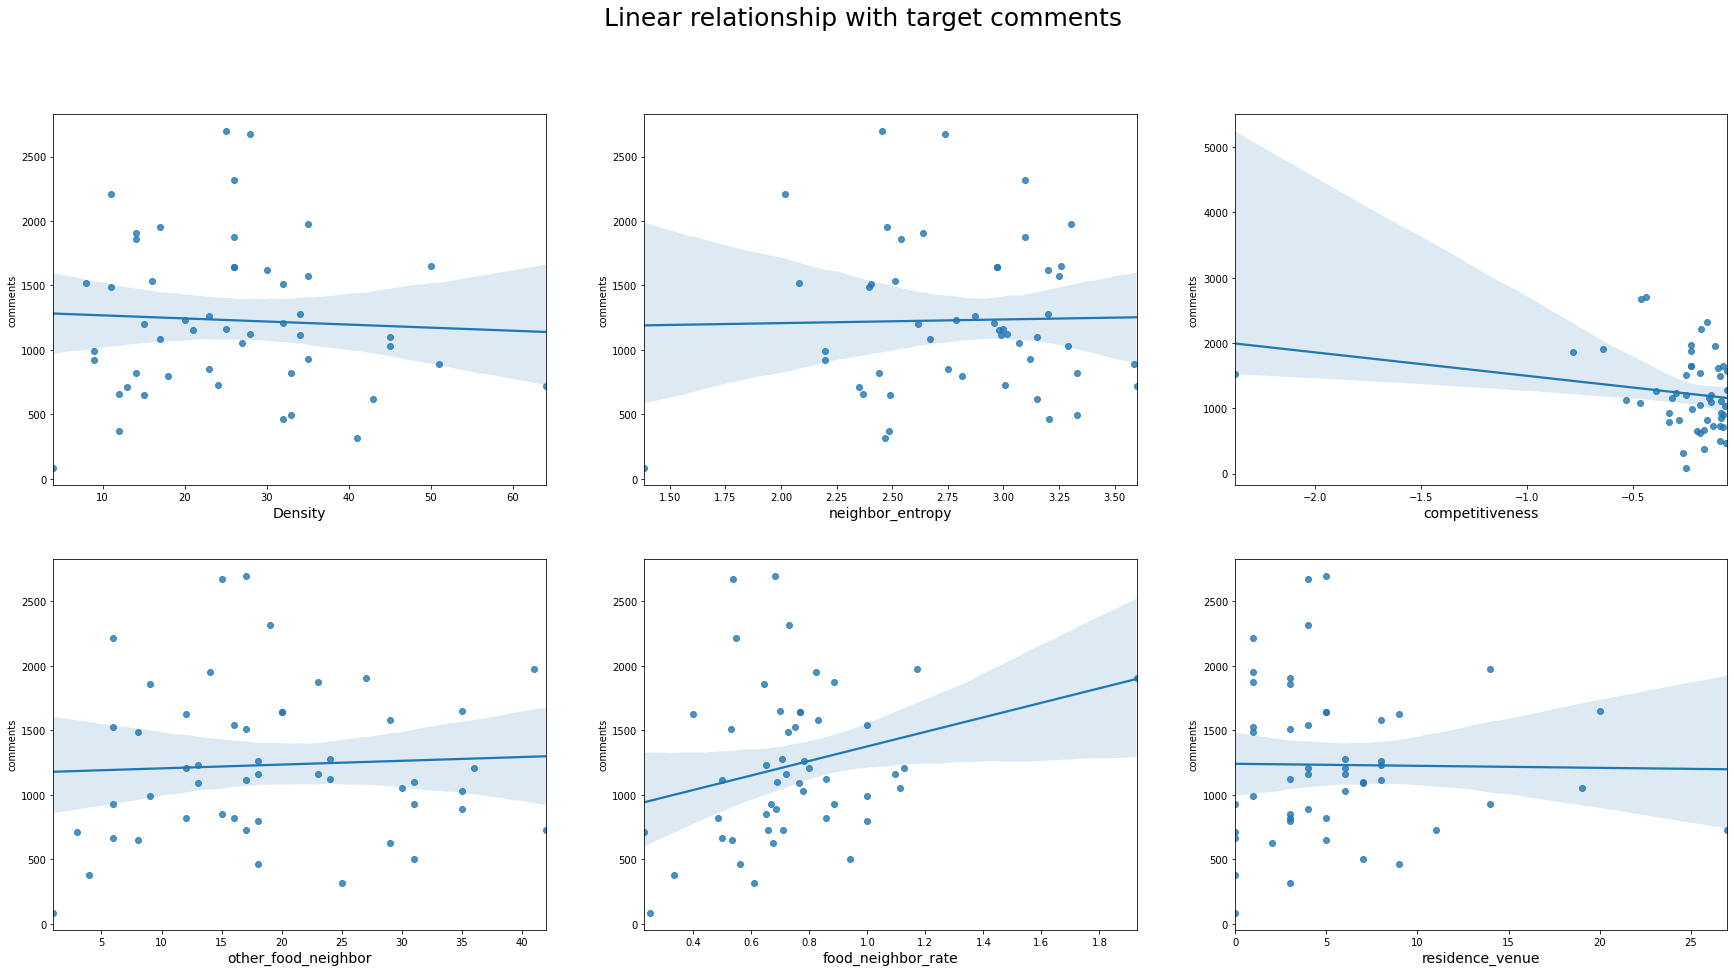

In [11]:
features = ['Density', 'neighbor_entropy', 'competitiveness', 'other_food_neighbor', 'food_neighbor_rate', 'residence_venue']

fig = plt.figure(figsize = (30, 15))
fig.suptitle('Linear relationship with target comments', fontsize = 25)

for i in range(len(features)):
  ax = fig.add_subplot(2, 3, i + 1)
  sns.regplot(df_ny_data[features[i]], df_ny_data['comments'], ax = ax)
  ax.set_xlabel(features[i], fontsize = 14)
    

Text(0, 0.5, 'Density')

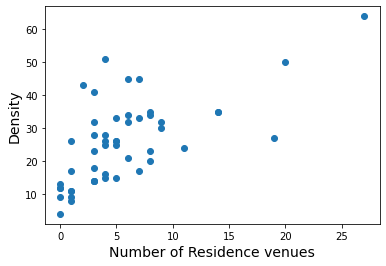

In [12]:
#Observe the relationship between venue features
plt.figure()
plt.scatter(x = 'residence_venue', y = 'Density', data = df_ny_data)
plt.xlabel('Number of Residence venues', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

###I assume that more residence venues indicates more residents in the area, thus attracts more venue surrounding.

Text(0, 0.5, 'Food venues around')

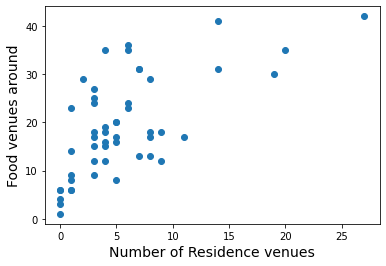

In [13]:
plt.figure()
plt.scatter(x = 'residence_venue', y = 'other_food_neighbor', data = df_ny_data)
plt.xlabel('Number of Residence venues', fontsize = 14)
plt.ylabel('Food venues around', fontsize = 14)

###Same observing the plot, the more residents may attracts more food restaurants venue. These two feautres have positive linear relationship

Text(0, 0.5, 'Number of comments')

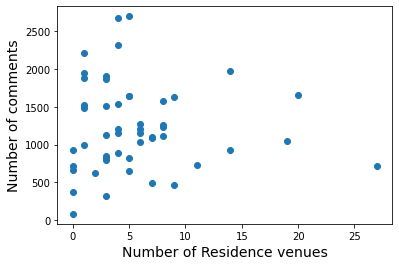

In [14]:
plt.figure()
plt.scatter(x = 'residence_venue', y = 'comments', data = df_ny_data)
plt.xlabel('Number of Residence venues', fontsize = 14)
plt.ylabel('Number of comments', fontsize = 14)

###However the result shown by Mcdonald's restaurant store shows different relationship, residents popularity seems not clearly related to number of comments. 

###But I could see that where less residents, more Mcdonald's store is located. Seems that these fast food restaurants prefers not open near the residence area.

In [15]:
df_ny_data['total_compet_rate'] = df_ny_data['food_neighbor_rate'] - df_ny_data['competitiveness']
print(df_ny_data.head())

   Density  neighbor_entropy  competitiveness  other_food_neighbor  \
0     41.0          2.466631        -0.268293                   25   
1     43.0          3.150678        -0.186047                   29   
2     26.0          2.971377        -0.230769                   20   
3     26.0          2.971377        -0.230769                   20   
4     15.0          2.488328        -0.200000                    8   

   food_neighbor_rate  residence_venue  comments  ratings  total_compet_rate  
0            0.609756                3       318      3.3           0.878049  
1            0.674419                2       622      3.7           0.860465  
2            0.769231                5      1644      3.8           1.000000  
3            0.769231                5      1644      3.8           1.000000  
4            0.533333                5       652      3.9           0.733333  


###Total competitive rate represents the "total competitive restaurant neighbor rate including Fast Food Restaurant"

In [16]:
df_ny_data.isnull().sum()

Density                0
neighbor_entropy       0
competitiveness        0
other_food_neighbor    0
food_neighbor_rate     0
residence_venue        0
comments               0
ratings                0
total_compet_rate      0
dtype: int64

Text(0, 0.5, 'Neighbor Entropy')

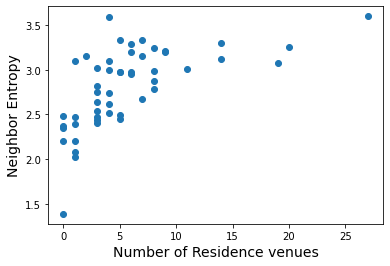

In [17]:
plt.figure()
plt.scatter(x = 'residence_venue', y = 'neighbor_entropy', data = df_ny_data)
plt.xlabel('Number of Residence venues', fontsize = 14)
plt.ylabel('Neighbor Entropy', fontsize = 14)

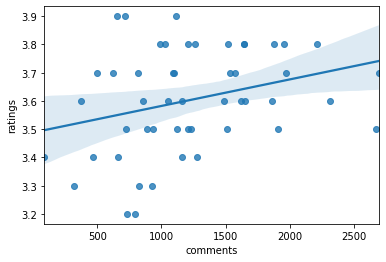

In [19]:
sns.regplot(df_ny_data['comments'], df_ny_data['ratings'])

###There is positive relationship between a retail store's popularity and it's ratings. We decide to try weight the popularity by it's rating as ranking accordance, assume that we expect a highest ranking store have both high popularity and high comments.

In [20]:
df_ny_data['weight_comment'] = df_ny_data['ratings']*df_ny_data['comments']
df_to_data['weight_comment'] = df_to_data['ratings']*df_to_data['comments']
print(df_ny_data.head())

   Density  neighbor_entropy  competitiveness  other_food_neighbor  \
0     41.0          2.466631        -0.268293                   25   
1     43.0          3.150678        -0.186047                   29   
2     26.0          2.971377        -0.230769                   20   
3     26.0          2.971377        -0.230769                   20   
4     15.0          2.488328        -0.200000                    8   

   food_neighbor_rate  residence_venue  comments  ratings  total_compet_rate  \
0            0.609756                3       318      3.3           0.878049   
1            0.674419                2       622      3.7           0.860465   
2            0.769231                5      1644      3.8           1.000000   
3            0.769231                5      1644      3.8           1.000000   
4            0.533333                5       652      3.9           0.733333   

   weight_comment  
0          1049.4  
1          2301.4  
2          6247.2  
3          6247.2 

###Define ranking performance metric

In [21]:
# define ranking metrics

# NDCG top-k ranking = DCG / IDCG
#DCG: set predicted rank output list = y_predict(ranked by prediction score)
#y_predict: pair of [item, predicted score]

def comput_rank(score_true, score_predict):
    # score_true: list or dataframe containing real scores
    # score_predict: list or dataframe containing predict scores
    # return: Ranked list of items based on true score and predict score
    y_true = pd.DataFrame({'true_score':list(score_true)})
    y_true_rk = y_true.sort_values(by = 'true_score', ascending = False)
    y_true_rk =list(y_true_rk.index.values) # items rank by real score

    y_true['predict_score'] = score_predict
    y_pred_rk = y_true.sort_values(by = 'predict_score', ascending = False)
    y_pred_rk = list(y_pred_rk.index.values)

    gc.collect()

    return y_true_rk, y_pred_rk
    
def NDCG_k(y_true, y_pred, k):
    # Compute NDCG for first K ranked items
    # y_true: Real ranked item list
    # y_pred: Predicted ranked itme list
    DCG = 0
    IDCG = 0
    L = len(y_true)
    # DCG & IDCG
    for i in range(1, k + 1):
      try:
        rank_i = y_true.index(y_pred[i-1]) + 1
        rel_i = (L - rank_i + 1)/L
        DCG += (2**(rel_i) - 1) / np.log2(i + 1)

        rel_i_ideal = (L - i + 1)/L
        IDCG += (2**(rel_i_ideal) - 1) / np.log2(i + 1)
      except:
        print(y_true)
        print(y_pred[i-1])
    
    NDCG = DCG / IDCG

    return NDCG



In [78]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

print('Candidate models loaded.')

#Test the efficiency of each feature, assess the performance
# Define metrics
from scipy.stats import rankdata
import random
from numpy.random import permutation

columns = ['Density', 'neighbor_entropy', 'competitiveness', 'other_food_neighbor', 'food_neighbor_rate', 'residence_venue', 'comments']

def preprocessing(df, feature, degree):
    # create training features, scaling, and target value
    # df: dataframe containing all features and target
    # degree: degree for polynomial features
    # feature: list containing selected feature for training
    # return: poly_feature, y_true (2D shape)

    df_y = df['comments'].values.reshape(-1, 1)

    if len(feature) == 1:
       df_x = df[feature].values.reshape(-1, 1)
    else:
       df_x = df[feature]
    
    #scaling
    scaler = MinMaxScaler()
    df_x = scaler.fit_transform(df_x)
    df_y = scaler.fit_transform(df_y)

    # Create polynomial feature
    x_data = df_x
    poly = PolynomialFeatures(degree = degree) # require 2D input
    poly_x = poly.fit_transform(x_data)
    y_data = df_y.reshape(-1, 1)

    return poly_x, y_data


Candidate models loaded.


###Normalize the feautures to accelerate training

In [82]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

# Search for best parameters

poly_x, y_data = preprocessing(df_ny_data, ['Density'], 10)

lr = Ridge(alpha = 0.01)
mean_score = 0
mean_rand_score = 0
iterations = 1000
mse_list = []
df_ny_perform = pd.DataFrame(columns = df_x.columns)

test_size = 0.12
print('Training size:', int(poly_x.shape[0]*(1 - test_size) ))
print('Testing size:', int(len(y_data)*test_size))

for iterate in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(poly_x, y_data, test_size = test_size)

    lr.fit(x_train, y_train)
    predict_score = lr.predict(x_test)
    
    score = ndcg_score([list(y_test.flatten())], [list(predict_score.flatten())], 3)
    mean_score += score

    rand_score = [np.random.uniform(y_test.min(), y_test.max()) for i in range(len(y_test))]
    rand_score = ndcg_score([list(y_test.flatten())], [rand_score], 3)
    mean_rand_score += rand_score  

mean_score = mean_score / iterations
mean_rand_score = mean_rand_score/ iterations
print('Mean score = ', mean_score)
print('Random rank score = ', mean_rand_score)

df_ny_perform.loc[0, 'Density'] = mean_score


Training size: 44
Testing size: 6
Mean score =  0.7648793380862318
Random rank score =  0.7014402850410508


In [83]:
# test on toronto data
lr = Ridge(alpha = 0.01)
lr.fit(poly_x, y_data) # fit on whole new york data

poly_x_to, y_data_to = preprocessing(df_to_data, ['Density'], 10)
y_pred = lr.predict(poly_x_to)
score = ndcg_score([list(y_data_to.flatten())], [list(y_pred.flatten())], 10)
print('Predict score on toronto:', score)

rand_score = [np.random.uniform(y_data_to.min(), y_data_to.max()) for i in range(len(y_data_to))]
rand_score = ndcg_score([list(y_data_to.flatten())], [rand_score], 10)
print('Random score:', rand_score)  

Predict score on toronto: 0.5624965112717001
Random score: 0.7348618747313271


###Model in New york data don't work well on Toronto data. It seems venue data information within one city couldn't be applied on another city directly.

In [88]:

poly_x, y_data = preprocessing(df_ny_data, ['competitiveness'], 10)

lr = Ridge(alpha = 0.01)
mean_score = 0
mean_rand_score = 0
iterations = 1000
mse_list = []
df_ny_perform = pd.DataFrame(columns = df_x.columns)

test_size = 0.12
print('Training size:', int(poly_x.shape[0]*(1 - test_size) ))
print('Testing size:', int(len(y_data)*test_size))

for iterate in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(poly_x, y_data, test_size = test_size)

    lr.fit(x_train, y_train)
    predict_score = lr.predict(x_test)
    
    score = ndcg_score([list(y_test.flatten())], [list(predict_score.flatten())], 3)
    mean_score += score

    rand_score = [np.random.uniform(y_test.min(), y_test.max()) for i in range(len(y_test))]
    rand_score = ndcg_score([list(y_test.flatten())], [rand_score], 3)
    mean_rand_score += rand_score  

mean_score = mean_score / iterations
mean_rand_score = mean_rand_score/ iterations
print('Mean score = ', mean_score)
print('Random rank score = ', mean_rand_score)

df_ny_perform.loc[0, 'Density'] = mean_score

Training size: 44
Testing size: 6
Mean score =  0.7624801828730006
Random rank score =  0.7045002404926708


In [89]:

poly_x, y_data = preprocessing(df_ny_data, ['total_compet_rate'], 10)

lr = Ridge(alpha = 0.01)
mean_score = 0
mean_rand_score = 0
iterations = 1000
mse_list = []
df_ny_perform = pd.DataFrame(columns = df_x.columns)

test_size = 0.12
print('Training size:', int(poly_x.shape[0]*(1 - test_size) ))
print('Testing size:', int(len(y_data)*test_size))

for iterate in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(poly_x, y_data, test_size = test_size)

    lr.fit(x_train, y_train)
    predict_score = lr.predict(x_test)
    
    score = ndcg_score([list(y_test.flatten())], [list(predict_score.flatten())], 3)
    mean_score += score

    rand_score = [np.random.uniform(y_test.min(), y_test.max()) for i in range(len(y_test))]
    rand_score = ndcg_score([list(y_test.flatten())], [rand_score], 3)
    mean_rand_score += rand_score  

mean_score = mean_score / iterations
mean_rand_score = mean_rand_score/ iterations
print('Mean score = ', mean_score)
print('Random rank score = ', mean_rand_score)

df_ny_perform.loc[0, 'Density'] = mean_score

Training size: 44
Testing size: 6
Mean score =  0.791076576898632
Random rank score =  0.6966109765127232


###We'd found that total_compet_rate performs better than single comopetitiveness. This can be concluded that other types restaurants contribute the the competitiveness for retail store other than fast food restaurant.

In [ ]:
x_data = df_x_['neighbor_entropy'].values.reshape(-1, 1)
poly = PolynomialFeatures(degree = 20)
poly_x = poly.fit_transform(x_data)
print('Poly features shape:', poly_x.shape)
y_data = df_y_.reshape(-1, 1)

mean_score = 0
mean_rand_score = 0
mse_list = []
for iterate in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(poly_x, y_data, test_size = 0.1)

    lr.fit(x_train, y_train)
    predict_score = lr.predict(x_test)
    
    score = ndcg_score([list(y_test.flatten())], [list(predict_score.flatten())], 4)
    mean_score += score

    rand_score = [np.random.uniform(y_test.min(), y_test.max()) for i in range(len(y_test))]
    rand_score = ndcg_score([list(y_test.flatten())], [rand_score], 4)
    mean_rand_score += rand_score

mean_score = mean_score / iterations
mean_rand_score = mean_rand_score/ iterations
print('Mean score = ', mean_score)
print('Random rank score = ', mean_rand_score)

df_ny_perform.loc[0, 'neighbor_entropy'] = mean_score


In [ ]:
x_data = df_x_['other_food_neighbor'].values.reshape(-1, 1)
poly = PolynomialFeatures(degree = 20)
poly_x = poly.fit_transform(x_data)
print('Poly features shape:', poly_x.shape)
y_data = df_y_.reshape(-1, 1)

mean_score = 0
mean_rand_score = 0
mse_list = []
for iterate in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(poly_x, y_data, test_size = 0.1)

    lr.fit(x_train, y_train)
    predict_score = lr.predict(x_test)
    
    score = ndcg_score([list(y_test.flatten())], [list(predict_score.flatten())], 4)
    mean_score += score

    rand_score = [np.random.uniform(y_test.min(), y_test.max()) for i in range(len(y_test))]
    rand_score = ndcg_score([list(y_test.flatten())], [rand_score], 4)
    mean_rand_score += rand_score

mean_score = mean_score / iterations
mean_rand_score = mean_rand_score/ iterations
print('Mean score = ', mean_score)
print('Random rank score = ', mean_rand_score)

df_ny_perform.loc[0, 'other_food_neighbor'] = mean_score
print(df_ny_perform)


In [ ]:
x_data = df_x_['food_neighbor_rate'].values.reshape(-1, 1)
poly = PolynomialFeatures(degree = 20)
poly_x = poly.fit_transform(x_data)
print('Poly features shape:', poly_x.shape)
y_data = df_y_.reshape(-1, 1)

mean_score = 0
mean_rand_score = 0
mse_list = []
for iterate in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(poly_x, y_data, test_size = 0.1)

    lr.fit(x_train, y_train)
    predict_score = lr.predict(x_test)
    
    score = ndcg_score([list(y_test.flatten())], [list(predict_score.flatten())], 4)
    mean_score += score

    rand_score = [np.random.uniform(y_test.min(), y_test.max()) for i in range(len(y_test))]
    rand_score = ndcg_score([list(y_test.flatten())], [rand_score], 4)
    mean_rand_score += rand_score

mean_score = mean_score / iterations
mean_rand_score = mean_rand_score/ iterations
print('Mean score = ', mean_score)
print('Random rank score = ', mean_rand_score)

df_ny_perform.loc[0, 'food_neighbor_rate'] = mean_score
print(df_ny_perform)


In [ ]:
x_data = df_x_['residence_venue'].values.reshape(-1, 1)
poly = PolynomialFeatures(degree = 20)
poly_x = poly.fit_transform(x_data)
print('Poly features shape:', poly_x.shape)
y_data = df_y_.reshape(-1, 1)

mean_score = 0
mean_rand_score = 0
mse_list = []
for iterate in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(poly_x, y_data, test_size = 0.1)

    lr.fit(x_train, y_train)
    predict_score = lr.predict(x_test)
    
    score = ndcg_score([list(y_test.flatten())], [list(predict_score.flatten())], 4)
    mean_score += score

    rand_score = [np.random.uniform(y_test.min(), y_test.max()) for i in range(len(y_test))]
    rand_score = ndcg_score([list(y_test.flatten())], [rand_score], 4)
    mean_rand_score += rand_score

mean_score = mean_score / iterations
mean_rand_score = mean_rand_score/ iterations
print('Mean score = ', mean_score)
print('Random rank score = ', mean_rand_score)

df_ny_perform.loc[0, 'residence_venue'] = mean_score
df_ny_perform.loc[0, 'Random score'] = mean_rand_score
print(df_ny_perform)


In [ ]:
features = ['Density', 'neighbor_entropy', 'competitiveness', 'other_food_neighbor', 'food_neighbor_rate']
x_data = df_x_[features].values
poly = PolynomialFeatures(degree = 5)
poly_x = poly.fit_transform(x_data)
print('Poly features shape:', poly_x.shape)
y_data = df_y_.reshape(-1, 1)

mean_score = 0
mean_rand_score = 0
mse_list = []
for iterate in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(poly_x, y_data, test_size = 0.1)

    lr.fit(x_train, y_train)
    predict_score = lr.predict(x_test)
    
    score = ndcg_score([list(y_test.flatten())], [list(predict_score.flatten())], 4)
    mean_score += score

    rand_score = [np.random.uniform(y_test.min(), y_test.max()) for i in range(len(y_test))]
    rand_score = ndcg_score([list(y_test.flatten())], [rand_score], 4)
    mean_rand_score += rand_score

mean_score = mean_score / iterations
mean_rand_score = mean_rand_score/ iterations
print('Mean score = ', mean_score)
print('Random rank score = ', mean_rand_score)



In [ ]:

regressor = DecisionTreeRegressor(max_depth = 20)

poly = PolynomialFeatures(degree = 10)
poly_x = poly.fit_transform(x_data)
print('Poly features shape:', poly_x.shape)
y_data = df_y_.reshape(-1, 1)

mean_score = 0
mean_rand_score = 0

iterations = 1000
for iterate in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1)

    regressor.fit(x_train, y_train)
    predict_score = regressor.predict(x_test)
    
    score = ndcg_score([list(y_test.flatten())], [list(predict_score.flatten())], 4)
    mean_score += score

    rand_score = [np.random.uniform(y_test.min(), y_test.max()) for i in range(len(y_test))]
    rand_score = ndcg_score([list(y_test.flatten())], [rand_score], 4)
    mean_rand_score += rand_score
    
    
mean_score = mean_score / iterations
mean_rand_score = mean_rand_score/ iterations
print('Mean score = ', mean_score)
print('Random rank score = ', mean_rand_score)

In [ ]:
df_y_.flatten().shape

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf', degree = 10)

poly = PolynomialFeatures(degree = 10)
poly_x = poly.fit_transform(x_data)
print('Poly features shape:', poly_x.shape)
y_data = df_y_.flatten()

mean_score = 0
mean_rand_score = 0

iterations = 1000
for iterate in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1)

    svr.fit(x_train, y_train)
    predict_score = svr.predict(x_test)
    
    score = ndcg_score([list(y_test.flatten())], [list(predict_score.flatten())], 4)
    mean_score += score

    rand_score = [np.random.uniform(y_test.min(), y_test.max()) for i in range(len(y_test))]
    rand_score = ndcg_score([list(y_test.flatten())], [rand_score], 4)
    mean_rand_score += rand_score
    

mean_score = mean_score / iterations
mean_rand_score = mean_rand_score/ iterations
print('Mean score = ', mean_score)
print('Random rank score = ', mean_rand_score)

In [ ]:
df_data = pd.concat([df_to_data, df_ny_data])

scaler = MinMaxScaler()
df_data_x = df_data[features]
df_data_y = df_data['comments']
df_data_x = scaler.fit_transform(df_data_x)
df_data_y = scaler.fit_transform(df_data_y.values.reshape(-1, 1))


In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf', degree = 3)

poly = PolynomialFeatures(degree = 5)
poly_x = poly.fit_transform(df_data_x)
print('Poly features shape:', poly_x.shape)
df_data_y = df_data_y.flatten()

mean_score = 0
mean_rand_score = 0

iterations = 1000
for iterate in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(df_data_x, df_data_y, test_size = 0.1)

    svr.fit(x_train, y_train)
    predict_score = svr.predict(x_test)
    
    score = ndcg_score([list(y_test.flatten())], [list(predict_score.flatten())], 4)
    mean_score += score

    rand_score = [np.random.uniform(y_test.min(), y_test.max()) for i in range(len(y_test))]
    rand_score = ndcg_score([list(y_test.flatten())], [rand_score], 4)
    mean_rand_score += rand_score
    

mean_score = mean_score / iterations
mean_rand_score = mean_rand_score/ iterations
print('Mean score = ', mean_score)
print('Random rank score = ', mean_rand_score)